# Intro to Natrual langage processing

In [1]:
%pylab inline

def load_book(filename):
    fp = open(filename)#places "Hamlet" in a 
    res = fp.read()
    fp.close()
    return res
def saveto_book(filename):
    fp.open(filename,'w')
    res = fp.write()
    fp.close
    return res

Populating the interactive namespace from numpy and matplotlib


# Introduction and Motivation 

In computer linguistics probabalistic models are very useful. These models use bayesian probability to help predict words using word frequency and bayesian probability. 

# Objectives 

Statistical Language Model:
    
1) Explore word frequencies of various texts.

2) N-gram models

3) Generate "Random"sentences

# Exercise 1

In this Exercise we will be processing the text "Hamlet" by William Shakespeare. 

We will find the frequency of the words of "Hamlet" and then draw some conclusion about their frequencies.


In [2]:
fp = open('Hamlet.txt')#places "Hamlet" in a variable
play = fp.read()
fp.close()
#print(play)

CLEANING UP TEXT:
- In order to count the text we need to:
- Remove punctuation (;? , . !#:* -[])
- Convert to lower case

In [3]:
play = play.lower() # converts all the text to lowe case
Punctuation = ';?,.!#:*-[]'
for char in Punctuation: # removes Punctuation
    play  = play.replace(char,'')
#print(play)

In [4]:
words = play.split() # puts the entire text file into a list
#print(words)

USING THE DICTIONARIES WE:
- Can access value using key as index
- Can assign values to keys 

In [5]:
wordcount = {}# dictionary that holds all the words as keys
for word in words:
    if word in wordcount:
        wordcount[word]+=1
    else:
        wordcount[word] = 1
#print(wordcount)

In [6]:
def get_count(x):
    return x[1]

In [7]:
sorted_words = sorted(wordcount.items(),key = get_count,reverse=True)
counts = [pair[1] for pair in sorted_words]
percent = counts/sum(counts) *100

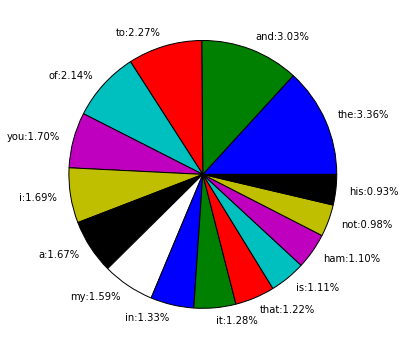

In [12]:
labels=[pair[0] for pair in sorted_words]
pct_label=["{}:{:4.2f}%".format(label,pct) for label,pct in zip(labels,percent)]
figure(figsize=(6,6))
pie(counts[:15],labels=pct_label[:15]);

# Frequency-Rank relation or Zipf's Law


Zipfs law (George Kingsley Zipf): 

Given some corpus of natural languages utterances, the frequencies of any word is inversely proportional to its rank in the frequency table. In symbols this can be written as:


$frequency = \dfrac{C}{rank}$  

or  

$frequency \times rank = C$  (where C is some constant

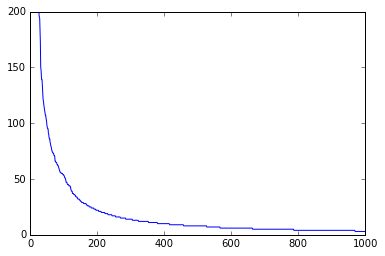

In [13]:
xlim(0,1000)
ylim(0,200)
plot(counts);

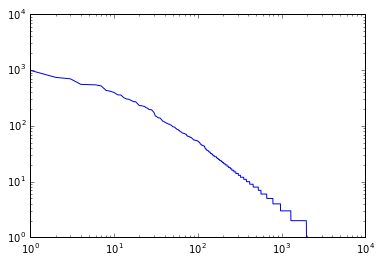

In [14]:
loglog(counts);

## Plotting Comparitive Frequencies

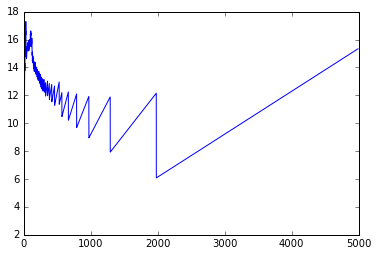

In [15]:
rank = arange(1,len(counts)+1)
plot(percent*rank);

So I believe that the oscillation will condense into a straight line with more words.

# Adding More Words

So we are now going to analyze more words using the "Complete Works of Shakespeare"(TheShakes) by William Shakespeare from Project Gutenburg.

In [16]:
fp = open('TheShakes.txt')#places "Hamlet" in a variable
play = fp.read()
fp.close()

In [17]:
play = play.lower() # converts all the text to lowe case
Punctuation = ';?,.!#:*-[]'
for char in Punctuation: # removes Punctuation
    play  = play.replace(char,'')
#print(play)
words = play.split() # puts the entire text file into a list
#print(words)
wordcount = {}# dictionary that holds all the words as keys
for word in words:
    if word in wordcount:
        wordcount[word]+=1
    else:
        wordcount[word] = 1
#print(wordcount)
def get_count(x):
    return x[1]
sorted_words = sorted(wordcount.items(),key = get_count,reverse=True)
counts = [pair[1] for pair in sorted_words]
percent = counts/sum(counts)*100

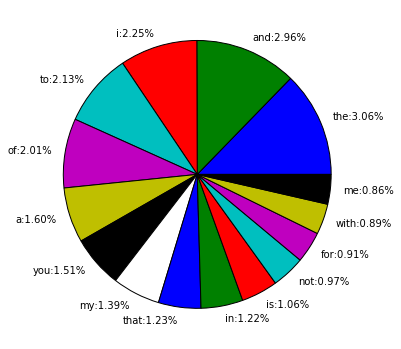

In [18]:
labels=[pair[0] for pair in sorted_words]
pct_label=["{}:{:4.2f}%".format(label,pct) for label,pct in zip(labels,percent)]
figure(figsize=(6,6))
pie(counts[:15],labels=pct_label[:15]);

This is a chart of only 15 of the top words(most frequently used words)

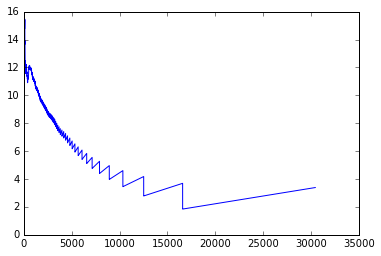

In [19]:
rank = arange(1,len(counts)+1)
plot(percent*rank);

My orginal hypothesis seems to be correct word the graph seems to be contracting to a linear trend/ trending towards Zipf's Law.

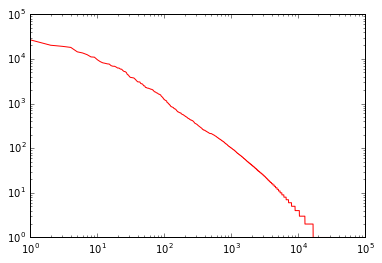

In [20]:
loglog(counts,'r')

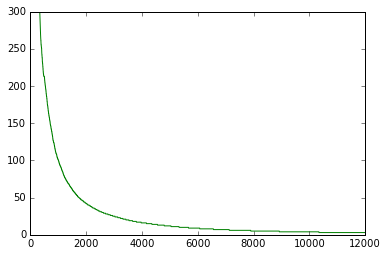

In [21]:
xlim(0,12000)
ylim(0,300)
plot(counts,'g');

# Exercise 2

I this Exercise we will recreate/scramble a text based on then analyzed word frequencies of the text. The next word placed will depend on the previous word placed because the word placement if based of  conditional probability this notion can be summed up by the equation.

**(UNIGRAM)**$$P(A) = \frac{\#of apperences of the word}{ total number of words}$$

**(BIGRAM)**$$P(A|B)\cdot P(B) = P(A \cap B)$$

**(TRIGRAM)**$$P(A\cap B | C)\cdot P(C) = P(A \cap C)$$

Where**:**
- $P(A|B)$ is the conditional probability of A given B.
- $P(A \cap B) = P(A) \cdot P(B)$ is the probability of both events A and B occuring 
- and $P(B)$  is the probability of B occuring.

**Example:**

So then for example given the word probability of the frist word place is "the" (which is the most frequently occuring) is $3.03\%$ then the probability of the next word being "in" given that you begin a the word the is:

$$P("in"|"the") = \dfrac{P(A) \cdot P(B)}{P(B)} = P(A)=1.22\%$$

Then for the probability of those two sequences of word is $3.36\% \times (1.22\%) = 4.099\% $
(in this particular example A and B are independent of each other)

The N-Gram model u

## Creating/Generating a Unigram Model

for unigram model 
 
- List of all words,including duplicates.

- Dictionary of word probability pairs
$\{w_1: p_1, ...,w_n:p_n\}$

- Two lists: [],[]
- Ease of implementation (code length/complexity)
- Time(how fast


In [22]:
from numpy.random import choice
load_book('TheShakes.txt');
#print(play)

In [23]:

words = play.split() 
wordcount = {}# dictionary that holds all the words as keys then asscociates them with freq.
for word in words:
    if word in wordcount:
        wordcount[word]+=1
    else:
        wordcount[word] = 1
#print(wordcount)
def get_count(x):
    return x[1]

#sorted_words = sorted(wordcount.items(),key = get_count,reverse=True)
#counts = [pair[1] for pair in sorted_words]
#return (percent = counts/sum(counts) *100)
def calculate_probabilities(wordlist):
    total_words = len(wordlist)
    wordcount = {word:0 for word in wordlist}
    for word in wordlist:
        wordcount[word] +=1
    return (list(wordcount.keys()), [freq/total_words for freq in wordcount.values()])

In [24]:
unigram = calculate_probabilities(words)
w,p = unigram

In [25]:
#for word in (choice(list(wordcount.keys()), size=200, replace=True, p=(percent/100))):
  # print(words, end=' ')

## Creating/Generating a Bigram Model

- First associate with each word of all following words.

- Use 'Calculate probabilites' to generate a word -probability lists of conditonal probabilities

In [26]:
firstword = words[: -1]
secondword = words[1:]
wordlists = {word:[] for word in firstword}
for word1,word2 in zip(firstword,secondword):
    wordlists[word1].append(word2)
    
bigram = {word:calculate_probabilities(following) for word, following in wordlists.items()} 


In [27]:
nwords = 200
word1 = choice(w,p=p)
for i in range(nwords):
    print(word1, end = ' ')
    w2,p2 = bigram[word1]
    word2 = choice(w2,p=p2)
    word1 = word2
    

and thereto will prove a fretting gust it to spend upon your friar holy wedlock hours claudio shall part to rejoice with the ears that charges for they have some distressful bread like a touch such copies (1) are pardon'd thee as i am not noble mistress rosalind a peascod your purse and with melody on a ship which ever dancing shoes they that to stretch him we take him as we forward peace which is on my land loyal blazon not confederate arms triumph leap the sun to ourselves to such copies (1) are they stay exit sound a happy then not fall flat the island of foresters and such man one but i carry them to othello fire to wear a scarf that had seen he had i am sorry madam madam but i see that rarest of a prison officer enter rosalind thou hadst shut the house enter mistress elbow my will pay the door to london before king ely and my naked in heaven's eye forehead and the weak a precious queen carouses to get you are again bianca where will i do this is the world's end <<this electronic a

## Creating/Generating a Trigram Model:

In [53]:
firstword = words[: -2]
secondword = words[1:-1]
thirdword = words[2:]
wordlists = {(word1,word2):[] for word1,word2 in zip(firstword,secondword)}
for word1,word2,word3 in zip(firstword,secondword,thirdword):
    wordlists[word1,word2].append(word3)
    
Trigram = {word:calculate_probabilities(following) for word, following in wordlists.items()} 

In [54]:
nwords = 200
word1 = choice(unigram[0],p = unigram[1])
nextwords = bigram[word1]
word2 = choice(nextwords[0],p=nextwords[1])
for i in range(nwords):
    print(word1, end = ' ')
    w3,p3 = Trigram[word1,word2]
    word3 = choice(w3,p=p3)
    word1 = word2
    word2 = word3

watch this last costly treaty th' interview that swallowed so much blood in him abated an the indentures be drawn in france amongst a grove of sycamore that westward rooteth from the forests wild but she king henry the fifth the countercheck quarrelsome and so i am not lucentio gremio yes i beseech your royal presence who knows not but truly i will speak most bitterly on you valentine why then be gleaned from the dead some that i do not in the glass against the stormy gusts of winter's day and yet methinks you are strong had my father's sight farewell the hopes of her excellence but to my birth near to fall before his time unto the empress of my fortune that you have not devised for the love of your discontent john i came along i must confess not brown cressida to say precisely 'thus i would see which is from the four or five attend him some thrice it shall be much forsworn and ev'n that pow'r which gave me honour yours gave land now as mad in pursuit queen margaret those gracious word

## Creating/Generating a Quadragram Model

In [55]:
firstword = words[: -3]
secondword = words[1:-2]
thirdword = words[2:-1]
fourthword = words [3:]
wordlists = {(word1,word2,word3):[] for word1,word2,word3 in zip(firstword,secondword,thirdword)}
for word1,word2,word3,word4 in zip(firstword,secondword,thirdword,fourthword):
    wordlists[word1,word2,word3].append(word4)
    
Quadragram = {word:calculate_probabilities(following) for word, following in wordlists.items()} 

In [56]:
nwords = 200
word1  = choice(unigram[0],p = unigram[1])
nextwords = bigram[word1] 
word2  = choice(nextwords[0],p=nextwords[1])
nextwordtwo = Trigram[word1,word2]
word3  = choice(nextwordtwo[0],nextwordtwo[1])
for i in range(nwords):
    print(word1, end = ' ')
    w4,p4 = Quadragram[word1,word2,word3]
    word4 = choice(w4,p=p4)
    word1 = word2
    word2 = word3
    word3 = word4

was 

C:\Users\ETR\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


TypeError: unhashable type: 'numpy.ndarray'

This code is suppose to print out a paragraph of text associated with the quadragram model but couldn't get this to work. It works similar to the models above.

# Exercise 4 (Perplexity)

The measuerment of the perplexity is the measurement of possibilties of the next word(s). The more inaccurate the model the higher the perplexity. 

## Perplexity for the Bigram Model

In [ ]:
unigram_dict= {w:p for w,p in zip(*unigram)}

In [47]:
unigram_dict ['the']
bigram_dict = {key:{w:p for w,p in zip(*value)}for key,value in bigram.items() }

In [48]:
total  = 0
word1 = words[0]
prob = unigram_dict[word1]
total = log2(prob)
for word2 in words[1:]:
    prob = bigram_dict[word1][word2]
    total += log2(prob)
    word1 = word2
perplexity = 2**(-total/len(words))
print("perplexity = {}".format(perplexity))

perplexity = 99.02939971667544
